<a href="https://colab.research.google.com/github/FredMiraglia/projeto_analise_dados/blob/main/head.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# importação das bibliotecas
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

importando as bibliotecas que serão utilizadas.


Projeto de previsão de doença cardíaca.

In [3]:
df = pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000,Up,0


Base de dados

In [4]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.200,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.400,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.200,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.000,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.000,Up,0


In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
#df.describe(include='all')

In [8]:
df['Age'].dtypes

dtype('int64')

In [9]:
df.dtypes.value_counts()

,count
int64,6
object,5
float64,1


12 colunas
6 do tipo int
6 do tipo object
1 do tipo float

A base de dados é composta por 12 variáveis.


*   5 são do tipo object.
*   6 do tipo int.
*   1 do tipo float.


In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000,918.000,918.000,918.000,918.000,918.000,918.000
mean,53.511,132.397,198.800,0.233,136.809,0.887,0.553
std,9.433,18.514,109.384,0.423,25.460,1.067,0.497
min,28.000,0.000,0.000,0.000,60.000,-2.600,0.000
25%,47.000,120.000,173.250,0.000,120.000,0.000,0.000
50%,54.000,130.000,223.000,0.000,138.000,0.600,1.000
75%,60.000,140.000,267.000,0.000,156.000,1.500,1.000
max,77.000,200.000,603.000,1.000,202.000,6.200,1.000


In [11]:
df = df[df['RestingBP']!=0]

In [12]:
df['Cholesterol']

,Cholesterol
0,289
1,180
2,283
3,214
4,195
5,339
6,237
7,208
8,207
9,284


In [13]:
df[df['Cholesterol']!=0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.000,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.000,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.000,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.500,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.000,Up,0


In [14]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


Não há nenhum valor faltando.

In [15]:
df.duplicated().sum()

0

não há nenhum valor duplicado.

In [16]:
print('A média das idades é: ',df.Age.mean(),"\n"
      "A mediana das idades é: ", df.Age.median(),'\n'
      "O desvio das idades é: ",df.Age.std(),'\n'
      "A variança das idades é: ",df.Age.var(),'\n'
      "Valor mínimo:",df.Age.min(),'\n'
      "Valor máximo: ", df.Age.max())

A média das idades é:  53.5092693565976 
A mediana das idades é:  54.0 
O desvio das idades é:  9.437635519745857 
A variança das idades é:  89.06896420356867 
Valor mínimo: 28 
Valor máximo:  77


aqui mostra á média da idade, a mediana da idade, o desvio padrão, a variância, valor mínimo e o valor máximo das idades.

In [17]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease'], dtype='object')

In [18]:
df.columns = ['Idade', 'Sexo', 'Tipo de dor no peito', 'BP em repouso', 'Colesterol', 'VS em jejum', 'ECG em repouso', 'FC máx.', 'Angina de exercício', 'Oldpeak', 'Inclinação ST' , 'Doença cardíaca']

aqui estou renomeando as colunas.

In [19]:
df.Sexo.value_counts()

,count
Sexo,
M,724
F,193


contidade de pessoas do sexo masculino e feminino.

In [20]:
homem = df[df['Sexo']=='M']
mulher = df[df['Sexo']=='F']

aqui estou separando a base de dado pelo sexo.

In [21]:
homem.Idade.mean(), mulher.Idade.mean()

(53.780386740331494, 52.49222797927461)

média das idades do sexo masculino e média das idades do sexo feminino.

<Axes: title={'center': 'Doença cardíaca por homem'}, xlabel='Doença cardíaca'>

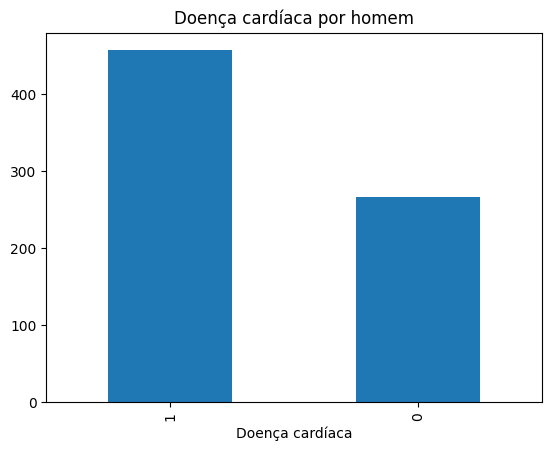

In [22]:
homem['Doença cardíaca'].value_counts()
homem['Doença cardíaca'].value_counts().plot(kind='bar', title='Doença cardíaca por homem')

Aqui nesse gráfico notamos que há mais homem com doença cardíaca do que sem doença.

<Axes: title={'center': 'Doença cardíaca por mulher'}, xlabel='Doença cardíaca'>

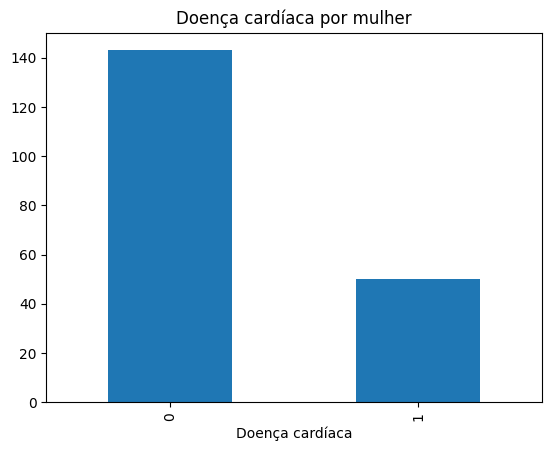

In [23]:
mulher['Doença cardíaca'].value_counts()
mulher['Doença cardíaca'].value_counts().plot(kind='bar', title='Doença cardíaca por mulher')

Nesse gráfico a quantidade de mulheres sem doença é maior.

In [24]:
df.Sexo.value_counts(normalize=True) * 100

,proportion
Sexo,
M,78.953
F,21.047


Aqui nós vemos que a proporção de homens é bem maior do que a proporção de mulheres.

In [25]:
homem['Doença cardíaca'].value_counts(normalize=True) * 100

,proportion
Doença cardíaca,
1,63.122
0,36.878


Aqui vemos que 63,17% dos homens sofrem de doença cardíaca.

In [26]:
mulher['Doença cardíaca'].value_counts(normalize=True) * 100

,proportion
Doença cardíaca,
0,74.093
1,25.907


aqui a porcentagem de mulheres com doença cardíaca é bem menor.

(Tipo de dor no peito
 ASY    496
 NAP    202
 ATA    173
 TA      46
 Name: count, dtype: int64,
 <Axes: title={'center': 'Tipo de dor no peito'}, xlabel='Tipo de dor no peito'>)

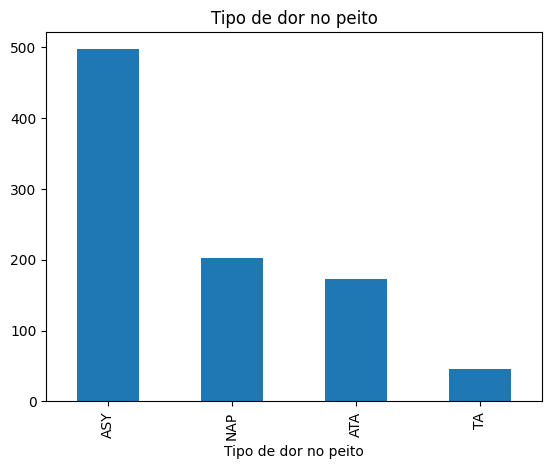

In [27]:
df['Tipo de dor no peito'].value_counts(), df['Tipo de dor no peito'].value_counts().plot(kind='bar', title='Tipo de dor no peito')

mostra a quantidade do tipo de dor no peito ASY é bem maior que as outras.

In [28]:
ataque = df[df['Doença cardíaca']==1]
ataque['Tipo de dor no peito'].value_counts()

,count
Tipo de dor no peito,
ASY,392
NAP,71
ATA,24
TA,20


ASY - assintomático
NAP - dor não anginiosa
ATA - angina atípica
TA - angina típica

Angina: dor no peito causada peladiminuíção do fluxo de sangue no coração.

mostra a quantidade do tipo de dor no peito ASY é bem maior que as outras, só de pessoas que sofrem de doença.

In [29]:
df['Tipo de dor no peito'].value_counts(normalize=True) * 100

,proportion
Tipo de dor no peito,
ASY,54.089
NAP,22.028
ATA,18.866
TA,5.016


In [30]:
n_ataque = df[df['Doença cardíaca']==0]
n_ataque['Tipo de dor no peito'].value_counts()

,count
Tipo de dor no peito,
ATA,149
NAP,131
ASY,104
TA,26


Aqui mostra a mesma informação so de pessoas que não sofre de doença.

In [31]:
colesterol = df.groupby('Doença cardíaca')['Colesterol'].mean()
colesterol

,Colesterol
Doença cardíaca,
0,227.122
1,176.288


Aqui tem uma informação muito importante, pessoas com doenças estão em média com colesteral mais baixo do que pessoas que não estão doentes.

In [32]:
df.Colesterol.replace(0,np.nan, inplace=True)

In [33]:
df['Colesterol'].value_counts().head(5)

,count
Colesterol,
254.000,11
223.000,10
220.000,10
216.000,9
230.000,9


In [34]:
df.Colesterol.mean()

244.6353887399464

In [35]:
df.Colesterol.replace(0, np.nan, inplace=True)

In [36]:
df.isnull().sum()

,0
Idade,0
Sexo,0
Tipo de dor no peito,0
BP em repouso,0
Colesterol,171
VS em jejum,0
ECG em repouso,0
FC máx.,0
Angina de exercício,0
Oldpeak,0


In [37]:
df.Colesterol.fillna(df.Colesterol.mean(), inplace=True)

In [38]:
df.Colesterol.sort_values( ascending=True).head()

,Colesterol
98,85.000
78,100.000
444,100.000
571,110.000
541,113.000


In [39]:
df.Colesterol.sort_values().head()

,Colesterol
98,85.000
78,100.000
444,100.000
571,110.000
541,113.000


In [40]:
df.columns

Index(['Idade', 'Sexo', 'Tipo de dor no peito', 'BP em repouso', 'Colesterol', 'VS em jejum', 'ECG em repouso', 'FC máx.', 'Angina de exercício', 'Oldpeak', 'Inclinação ST', 'Doença cardíaca'], dtype='object')

In [41]:
batimento = df.groupby('Doença cardíaca')['BP em repouso'].mean()
batimento

,BP em repouso
Doença cardíaca,
0,130.180
1,134.450


In [42]:
jejum = df.groupby('Doença cardíaca')['VS em jejum'].mean()
jejum

,VS em jejum
Doença cardíaca,
0,0.107
1,0.335


In [43]:
df.columns

Index(['Idade', 'Sexo', 'Tipo de dor no peito', 'BP em repouso', 'Colesterol', 'VS em jejum', 'ECG em repouso', 'FC máx.', 'Angina de exercício', 'Oldpeak', 'Inclinação ST', 'Doença cardíaca'], dtype='object')

In [44]:
df[df['BP em repouso']==0]

,Idade,Sexo,Tipo de dor no peito,BP em repouso,Colesterol,VS em jejum,ECG em repouso,FC máx.,Angina de exercício,Oldpeak,Inclinação ST,Doença cardíaca


In [45]:
df['BP em repouso'].head()

,BP em repouso
0,140
1,160
2,130
3,138
4,150


In [46]:
#df['BP em repouso'].describe(),
df[df['Doença cardíaca']==1]['BP em repouso'].describe()

,BP em repouso
count,507.000
mean,134.450
std,18.929
min,92.000
25%,120.000
50%,132.000
75%,145.000
max,200.000


In [47]:
df[df['Doença cardíaca']==0]['BP em repouso'].describe()

,BP em repouso
count,410.000
mean,130.180
std,16.500
min,80.000
25%,120.000
50%,130.000
75%,140.000
max,190.000


In [48]:
lista = []
for i in df.columns:
    if df[i].dtype != 'object':
        lista.append(i)
print(lista)

['Idade', 'BP em repouso', 'Colesterol', 'VS em jejum', 'FC máx.', 'Oldpeak', 'Doença cardíaca']


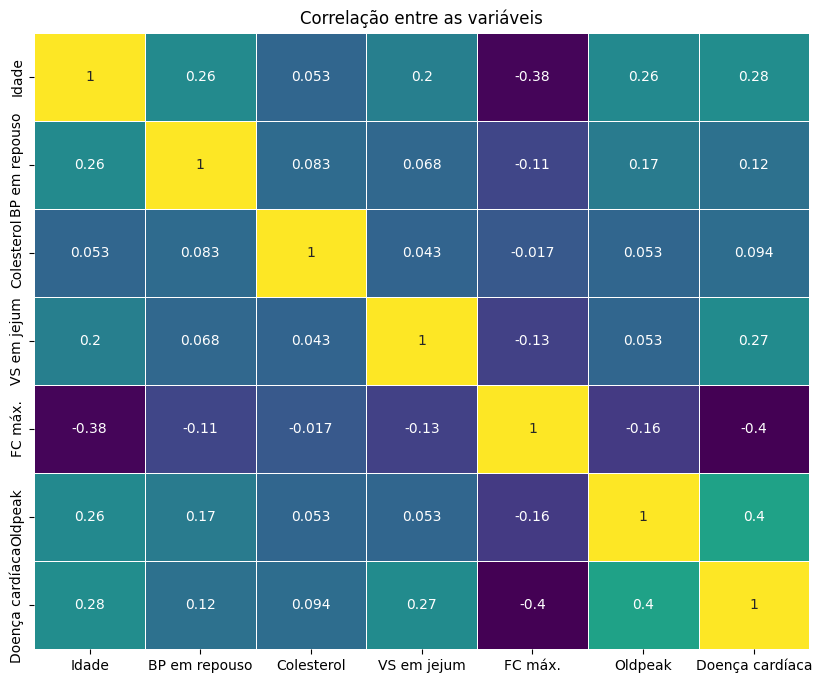

In [49]:
plt.figure(figsize=(10,8))
plt.title('Correlação entre as variáveis')
sns.heatmap(df[lista].corr(), annot=True, cmap='viridis', linewidths=0.5, cbar=False)
plt.show()

Esse gráfico de correlação entre as variáveis.

In [50]:
px.box(data_frame=df, x='Doença cardíaca', y='Idade', title='Doença cardíaca por idade')

In [51]:
df = df[ df['Idade']>34]

In [52]:
df.Sexo = df.Sexo.map({'M':1, 'F':0})

In [53]:
doenca = df[df['Doença cardíaca']==1]
doenca.head()

,Idade,Sexo,Tipo de dor no peito,BP em repouso,Colesterol,VS em jejum,ECG em repouso,FC máx.,Angina de exercício,Oldpeak,Inclinação ST,Doença cardíaca
1,49,0,NAP,160,180.000,0,Normal,156,N,1.000,Flat,1
3,48,0,ASY,138,214.000,0,Normal,108,Y,1.500,Flat,1
8,37,1,ASY,140,207.000,0,Normal,130,Y,1.500,Flat,1
11,58,1,ATA,136,164.000,0,ST,99,Y,2.000,Flat,1
13,49,1,ASY,140,234.000,0,Normal,140,Y,1.000,Flat,1


In [54]:
px.histogram(data_frame=doenca, x='Idade', title='Doença cardíaca por idade', color="Sexo")

In [55]:
px.bar(data_frame=doenca, x='Tipo de dor no peito', title='Doença cardíaca por tipo de dor no peito',color='Sexo')

In [56]:
px.histogram(data_frame=doenca, x='Colesterol', title='Doença cardíaca por colesterol',color='Sexo')

In [57]:
df['BP em repouso'].sort_values(ascending=True).head()

,BP em repouso
314,80
227,92
832,94
692,94
333,95


In [58]:
px.histogram(data_frame=doenca, x='BP em repouso', title='Doença cardíaca por BP em repouso',color='Sexo')


In [59]:
df['Tipo de dor no peito'] = df['Tipo de dor no peito'].map({'ASY':0, 'ATA':1, 'NAP':2, 'TA':3})

In [60]:
df['ECG em repouso'] = df['ECG em repouso'].map({'LVH':0, 'Normal':1, 'ST':2})

In [61]:
df['Angina de exercício'] = df['Angina de exercício'].map({'N':0, 'Y':1})

In [62]:
df['Inclinação ST'] = df['Inclinação ST'].map({'Down':0, 'Flat':1, 'Up':2})

In [63]:
df.head()

,Idade,Sexo,Tipo de dor no peito,BP em repouso,Colesterol,VS em jejum,ECG em repouso,FC máx.,Angina de exercício,Oldpeak,Inclinação ST,Doença cardíaca
0,40,1,1,140,289.000,0,1,172,0,0.000,2,0
1,49,0,2,160,180.000,0,1,156,0,1.000,1,1
2,37,1,1,130,283.000,0,2,98,0,0.000,2,0
3,48,0,0,138,214.000,0,1,108,1,1.500,1,1
4,54,1,2,150,195.000,0,1,122,0,0.000,2,0


<Axes: ylabel='Frequency'>

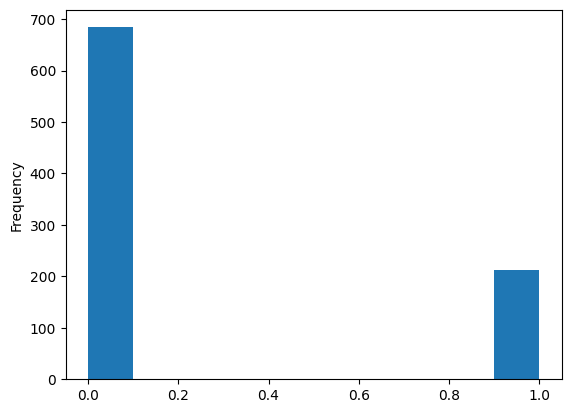

In [64]:
df['VS em jejum'].plot(kind='hist')

In [65]:
df['Doença cardíaca'].value_counts()

,count
Doença cardíaca,
1,501
0,395


In [66]:
df['VS em jejum'].shape

(896,)

In [67]:
pd.crosstab(df['VS em jejum'], df['Doença cardíaca']).style.background_gradient(cmap='viridis')

Doença cardíaca,0,1
VS em jejum,,
0,351,333
1,44,168


<Axes: xlabel='Doença cardíaca,VS em jejum'>

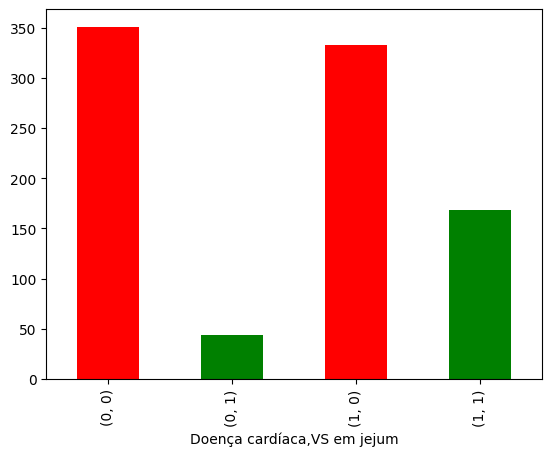

In [68]:
df.groupby('Doença cardíaca')['VS em jejum'].value_counts().plot(kind='bar', color=['red', 'green'])

In [69]:
df.shape

(896, 12)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X =  df.drop('Doença cardíaca', axis=1)
y = df['Doença cardíaca']

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Aqui estou padronizando os dados.

In [73]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_s, y_s = smote.fit_resample(X, y)

Aqui estou balanceando a base de dados.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Separando a base em base de treino e teste.

In [75]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.25, random_state=42)

Separando a base de dados com os valores balanceados em treino e teste.

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)
pred_lg = model_lg.predict(X_test)

In [78]:
print(confusion_matrix(y_test, pred_lg))
print(classification_report(y_test, pred_lg))

[[ 77  20]
 [ 21 106]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        97
           1       0.84      0.83      0.84       127

    accuracy                           0.82       224
   macro avg       0.81      0.81      0.81       224
weighted avg       0.82      0.82      0.82       224



In [79]:
model_lg_s = LogisticRegression()
model_lg_s.fit(X_s, y_s)
pred_lg_s = model_lg_s.predict(X_test_s)

In [80]:
print(confusion_matrix(y_test_s, pred_lg_s))
print(classification_report(y_test_s, pred_lg_s))

[[ 98  20]
 [ 26 107]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       118
           1       0.84      0.80      0.82       133

    accuracy                           0.82       251
   macro avg       0.82      0.82      0.82       251
weighted avg       0.82      0.82      0.82       251



In [81]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train_s, y_train_s)
pred_xgb = model_xgb.predict(X_test_s)

In [82]:
print(confusion_matrix(y_test_s, pred_xgb))
print(classification_report(y_test_s, pred_xgb))

[[101  17]
 [ 25 108]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       118
           1       0.86      0.81      0.84       133

    accuracy                           0.83       251
   macro avg       0.83      0.83      0.83       251
weighted avg       0.83      0.83      0.83       251



In [83]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_s, y_train_s)
pred_rf = model_rf.predict(X_test_s)

In [84]:
print(confusion_matrix(y_test_s, pred_rf))
print(classification_report(y_test_s, pred_rf))

[[102  16]
 [ 23 110]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       118
           1       0.87      0.83      0.85       133

    accuracy                           0.84       251
   macro avg       0.84      0.85      0.84       251
weighted avg       0.85      0.84      0.84       251

